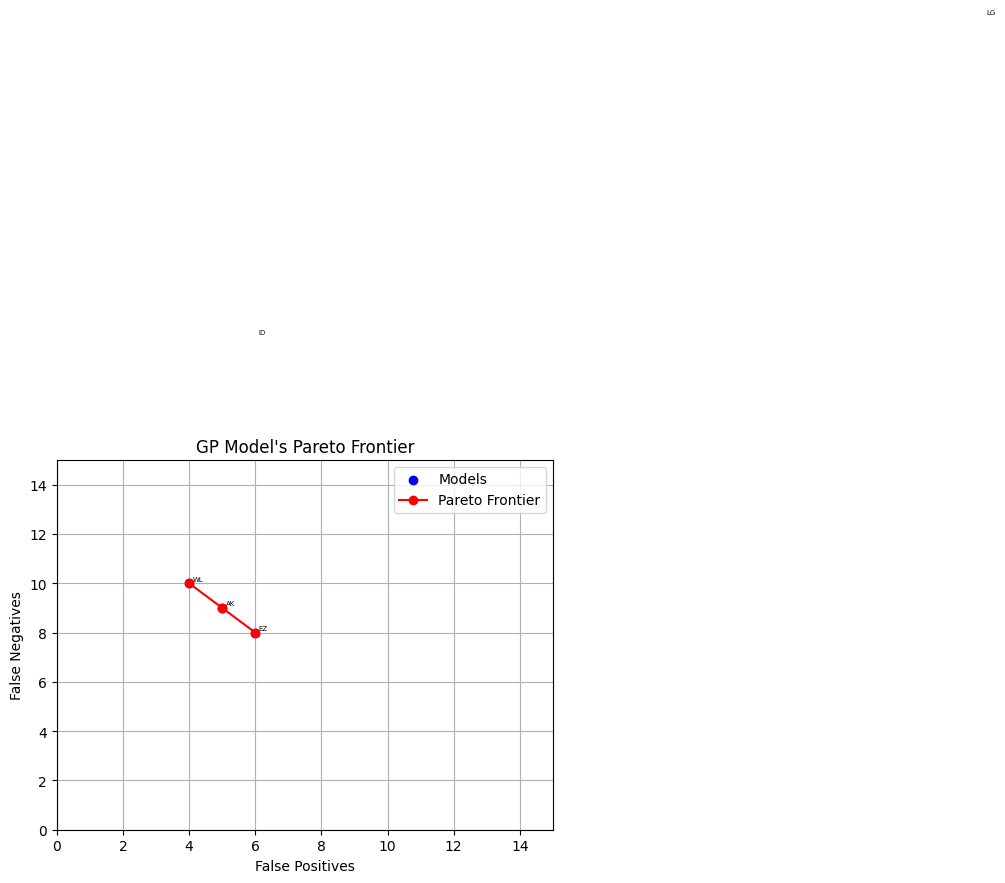

In [7]:
import matplotlib.pyplot as plt
import numpy as np

# Data: FP and FN
data = {
    "WL": (4, 10),
    "AK": (5, 9),
    "EZ": (6, 8),
    "ID": (6, 20),
    "LG": (28, 33)
}

models = list(data.keys())
points = np.array(list(data.values()))


sorted_indices = np.lexsort((points[:, 1], points[:, 0]))
sorted_points = points[sorted_indices]
sorted_models = [models[i] for i in sorted_indices]


pareto_frontier = [sorted_points[0]]
pareto_models = [sorted_models[0]]

for i in range(1, len(sorted_points)):
    if sorted_points[i][1] < pareto_frontier[-1][1]:
        pareto_frontier.append(sorted_points[i])
        pareto_models.append(sorted_models[i])

pareto_frontier = np.array(pareto_frontier)


plt.scatter(points[:, 0], points[:, 1], label="Models", color="blue")
plt.plot(pareto_frontier[:, 0], pareto_frontier[:, 1], label="Pareto Frontier", color="red", marker='o')

# label points
for i, model in enumerate(models):
    plt.text(points[i, 0] + 0.1, points[i, 1] + 0.1, model, fontsize=5)


plt.xlabel("False Positives")
plt.xlim(0,15) 
plt.ylabel("False Negatives")
plt.ylim(0,15) 

plt.title("GP Model's Pareto Frontier")
plt.legend()
plt.grid(True)
plt.show()
